In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of threshold to be tested: ", dictionaries.threshold_values)
threshold_values=dictionaries.threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, threshold_values)

Frame 743: 16 trajectories present.


,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5303,132569.205797,6.826742e+05,50546.892857,271,18.187500,743.0,6.0,76.037706,406.102764,4.832375,225
1,6625,146967.766651,8.029083e+05,46612.607143,319,18.543750,743.0,6.0,74.151932,454.946444,4.420877,230
2,7562,172358.658959,1.061745e+06,46210.500000,367,18.562500,743.0,6.0,71.779175,490.169741,4.007664,235
3,8302,202682.884972,1.216706e+06,44683.071429,399,18.695000,743.0,6.0,67.224982,528.391968,2.853930,240
4,8381,212728.891168,1.561106e+06,50885.357143,409,18.387805,743.0,6.0,66.766490,510.371548,4.010133,241
5,8522,233958.466703,1.512863e+06,48371.175000,370,20.299191,743.0,6.0,74.909406,538.851033,6.185504,245


In [11]:
df = pd.read_csv('Save/Jan_1998/sensitivity_analysis_singleTbThreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5303,132569.205797,6.826742e+05,50546.892857,271,18.187500,743.0,6.0,76.037706,406.102764,4.832375,225
1,6625,146967.766651,8.029083e+05,46612.607143,319,18.543750,743.0,6.0,74.151932,454.946444,4.420877,230
2,7562,172358.658959,1.061745e+06,46210.500000,367,18.562500,743.0,6.0,71.779175,490.169741,4.007664,235
3,8302,202682.884972,1.216706e+06,44683.071429,399,18.695000,743.0,6.0,67.224982,528.391968,2.853930,240
4,8381,212728.891168,1.561106e+06,50885.357143,409,18.387805,743.0,6.0,66.766490,510.371548,4.010133,241
5,8522,233958.466703,1.512863e+06,48371.175000,370,20.299191,743.0,6.0,74.909406,538.851033,6.185504,245


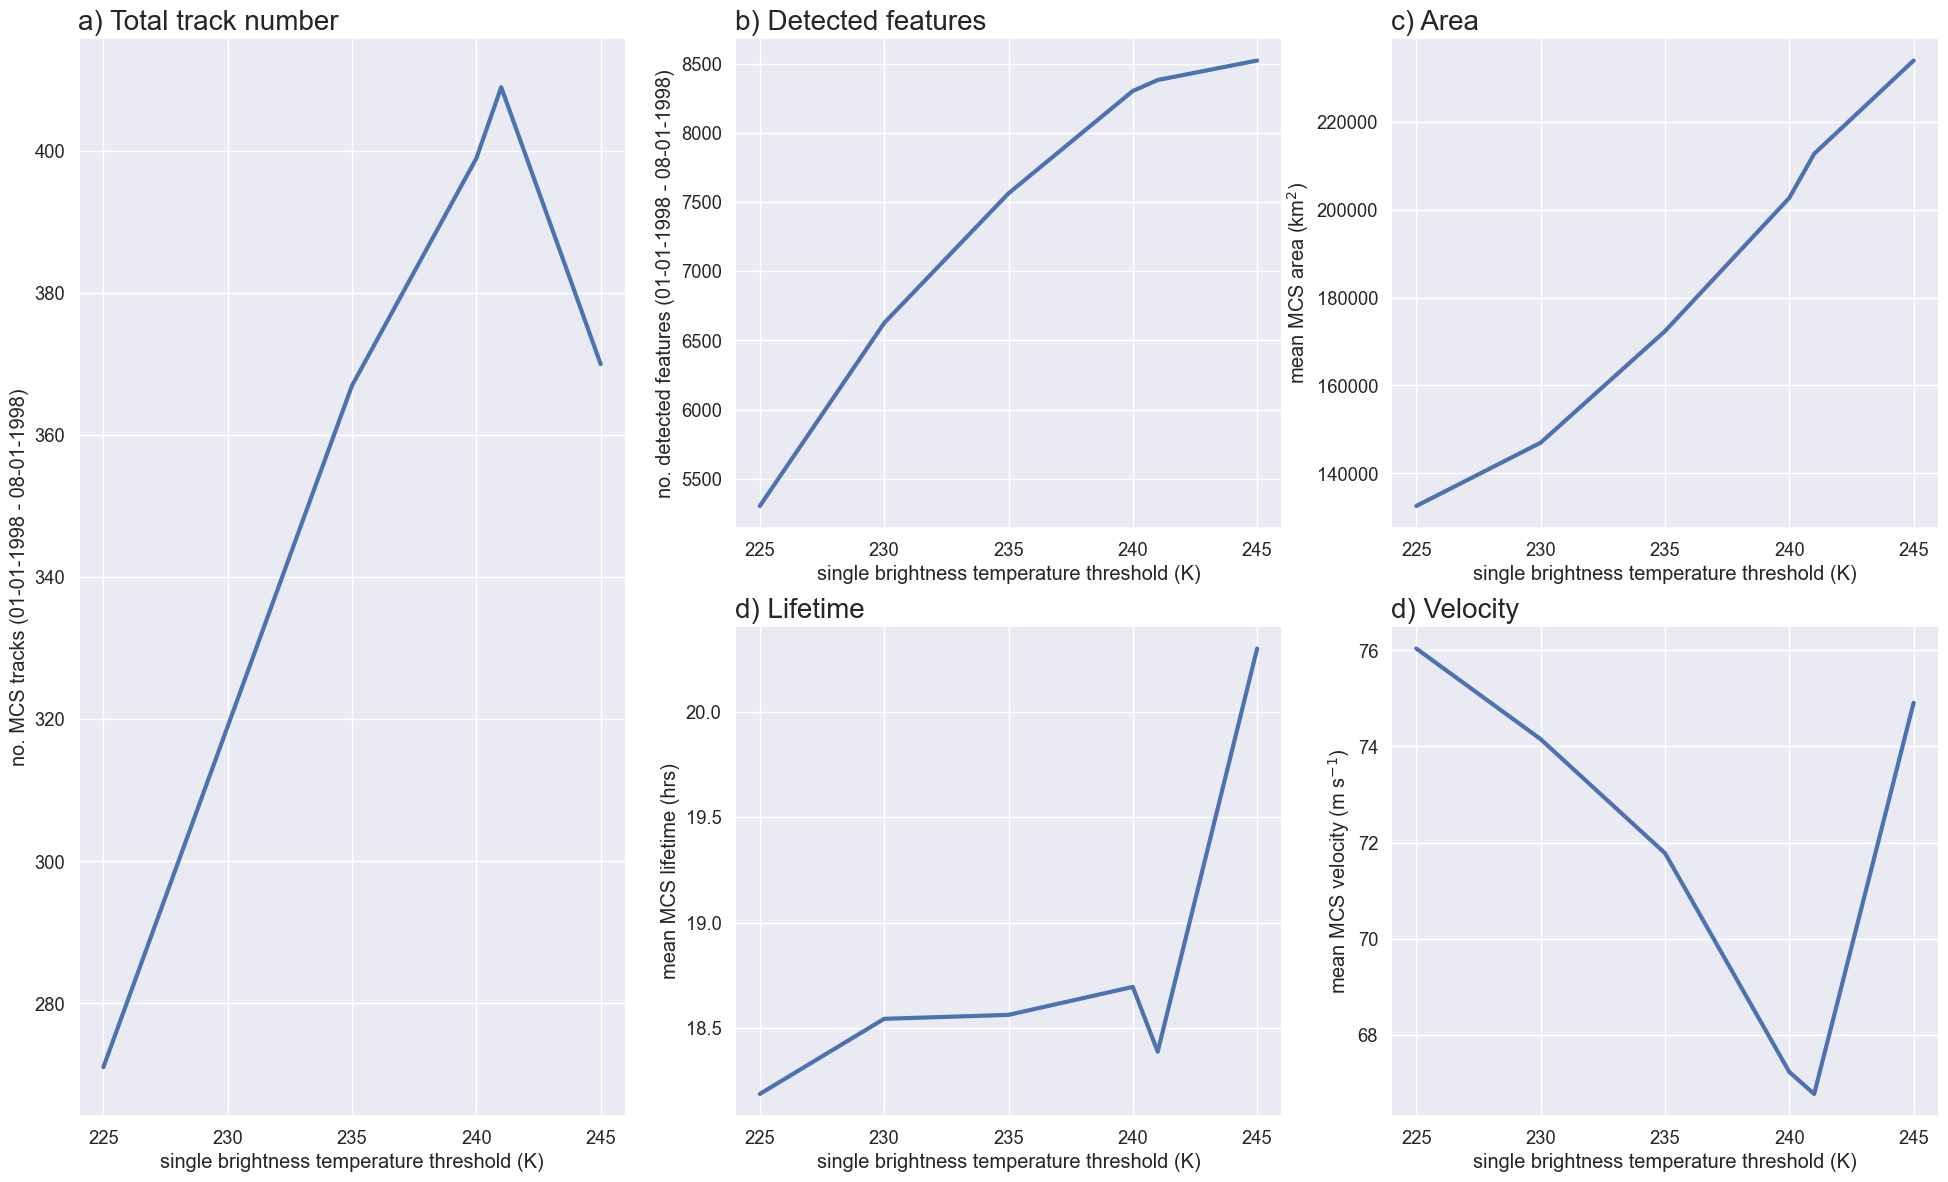

In [13]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[225,230,235,240,245]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-1998 - 08-01-1998)')
ax1.set_xlabel('single brightness temperature threshold (K)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-1998 - 08-01-1998)')
ax2.set_xlabel('single brightness temperature threshold (K)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('single brightness temperature threshold (K)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('single brightness temperature threshold (K)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('single brightness temperature threshold (K)')

plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis_.png')
